### Treść zadania

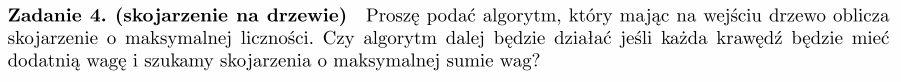

# Sposób I (wolniejszy)
### (Z wykorzystaniem algorytmu znajdującego maksymalny przepływ)

### Omówienie algorytmu

Ponieważ w tym przypadku mamy na wejściu drzewo, nie musimy już jak poprzednio badać sprawdzać, czy graf jest dwudzielny. Spójrzmy w jaki sposób przyporządkowujemy kolory wierzchołkom w drzewie:
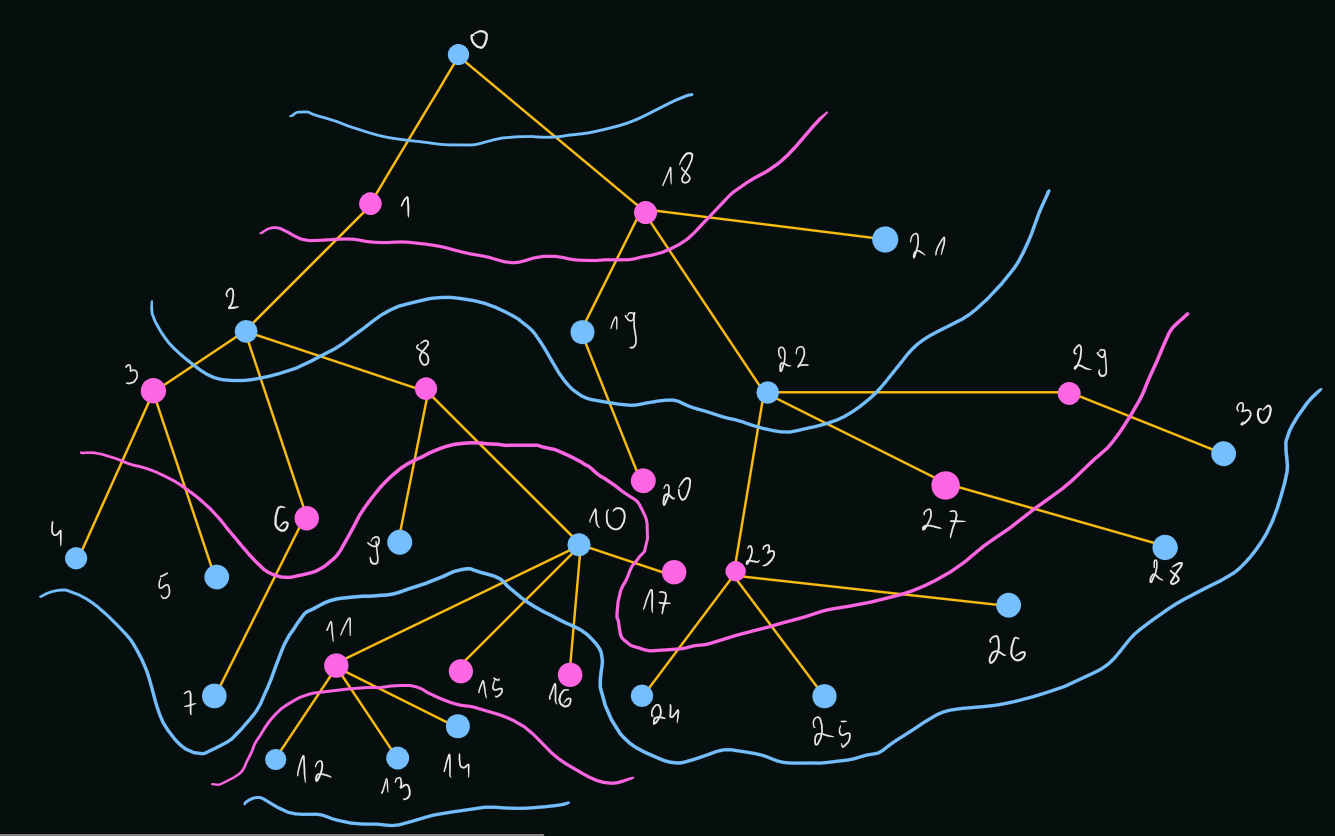
W przypadku drzewa kolejne warstwy mają inne kolory. W zależności od reprezentacji drzwa, wystrczy więc przejść drzewo algorytmem BFS/DFS i przyporządkować wierzchołkom odpowiednie kolory (podobnie jak dla zwykłych grafów). W kolejnym kroku łączymy wszystkie wierzchołki jednego koloru ze sztucznym źródłem i wszystkie wierzchołki drugiego koloru ze sztucznym ujściem. Wszytkim krawędziom przypisujemy wagi równe 1 i puszczamy algorytm znajdowania maksymalnego przepływu, startując w sztucznym źródle i kończąc w sztucznym ujściu.

# Sposób II (szybszy niż pierwszy)
### (Z wykorzystaniem imprezy instytutowej)

Jest to algorytm dynamiczny oparty na algorytmie impreza instytutowa. Drzewo będę reprezentował jako graf skierowany, gdzie na liście sąsiedztwa danego wierzchołka znajdują się wszystkie jego dzieci (tak dla ułatiwenia po prostu będzie to lista list, a nie instancja jakiejś klasy Tree, czy cóś).

### Złożoność

###### Obliczeniowa:
$ O(n) $, gdzie $ n $ - liczba wierzchołków w drzewie
###### Pamięciowa:
$ O(n) $

### Implementacja

In [1]:
def max_association(T: 'tree represented by adjacency lists', root_idx: 'index of a root node'):
    n = len(T)
    G = [-1] * n
    F = [-1] * n
    
    def f(x):
        """Maximum number of disjoint edges in the x node's subtree"""
        if F[x] < 0:
            F[x] = max(g(x), 0)
            diff = 0
            for y in T[x]:
                diff = max(diff, -f(y) + g(y) + 1)
            F[x] += diff
        return F[x]
        
    def g(x):
        """Maximum number of disjoint edges in the x node's subtree
        when we don't take any of edges which x is connected with"""
        if G[x] < 0:
            G[x] = 0
            for y in T[x]:
                G[x] += f(y)
        return G[x]
    
    res = f(root_idx)  
#     print(G)
#     print(F)
    
    return res

###### Kilka testów

##### Pomocnicze

In [2]:
def directed_graph_list(E: 'array of edges'):
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

Drzewo z przykładowym maksymalnym skojarzeniem
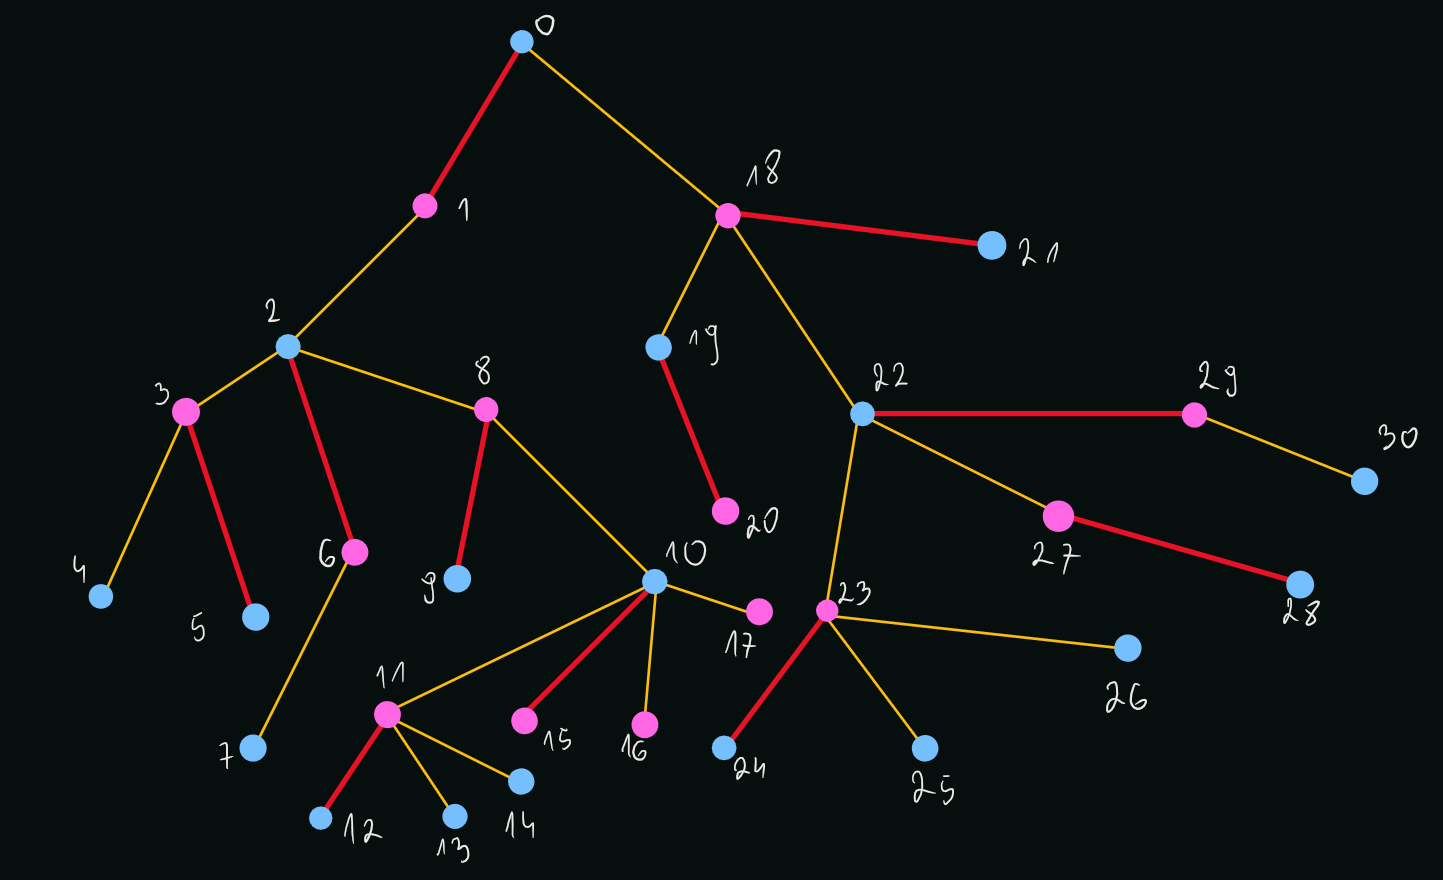

In [3]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (6, 7), (2, 8), (8, 9), (8, 10), (10, 17),
     (10, 16), (10, 15), (10, 11), (11, 12), (11, 13), (11, 14), (0, 18), (18, 21), (18, 19),
     (19, 20), (18, 22), (22, 23), (23, 24), (23, 25), (23, 26), (27, 28), (22, 27), (22, 29), (29, 30)]

T = directed_graph_list(E)

root = 0
print(max_association(T, root))

11


### (Dodatkowo) Zwracanie listy krawędzi z maksymalnego skojarzenia

In [4]:
def max_association(T: 'tree represented by adjacency lists', root_idx: 'index of a root node'):
    n = len(T)
    G = [-1] * n
    F = [-1] * n
    # Store vertices to which are connected vertices corresponding to the
    # indices of an array below
    E = [-1] * n 
    
    def f(x):
        """Maximum number of disjoint edges in the x node's subtree"""
        F[x] = max(g(x), 0)
        diff = 0
        best_y = None

        for y in T[x]:
            curr = -f(y) + g(y) + 1
            if curr > diff:
                diff = curr
                best_y = y

        if best_y is not None:
            # If there was a previous edge adjacent to the x or to the best_y
            # node, remove this edge
            if E[x] >= 0: E[E[x]] = -1
            if E[best_y] >= 0: E[E[best_y]] = -1
            E[x] = best_y
            E[best_y] = x
            F[x] += diff
        return F[x]
        
    def g(x):
        """Maximum number of disjoint edges in the x node's subtree
        when we don't take any of edges which x is connected with"""
        if G[x] < 0:
            G[x] = 0
            for y in T[x]:
                G[x] += f(y)
        return G[x]
    
    count = f(root_idx)
    
    # Get edges list
    edges = []
    for u in E:
        if u >= 0:
            edges.append((E[u], u))
            # Remove the second vertex in order not to get the same
            # edge later on again
            E[u] = -1

    return count, edges

###### Kilka testów

##### Pomocnicze

In [5]:
def directed_graph_list(E: 'array of edges'):
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

Drzewo z przykładowym maksymalnym skojarzeniem
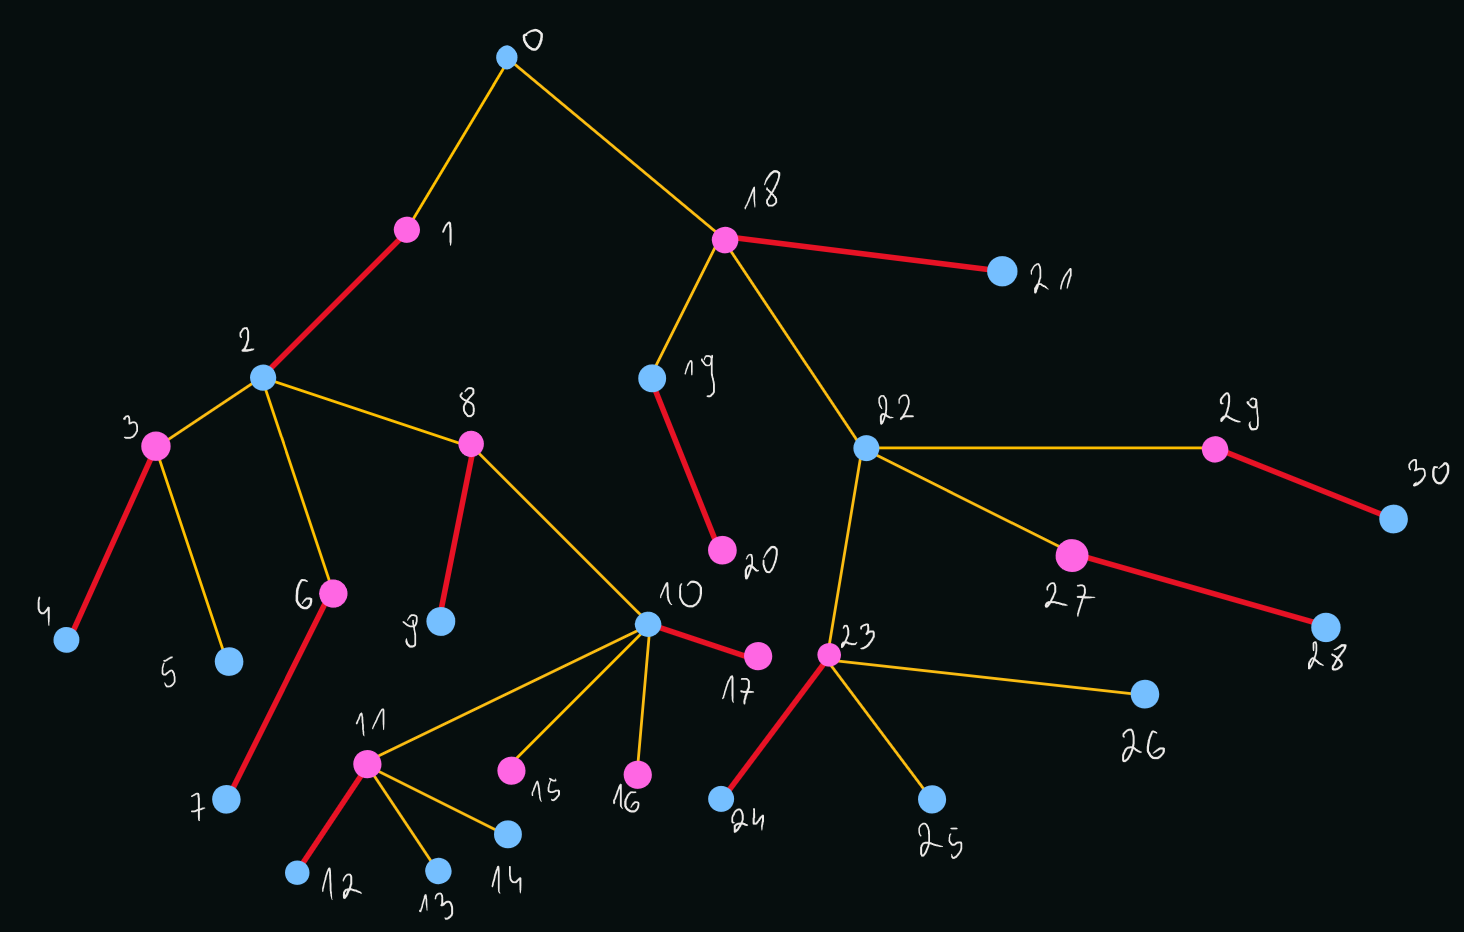

In [6]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (6, 7), (2, 8), (8, 9), (8, 10), (10, 17),
     (10, 16), (10, 15), (10, 11), (11, 12), (11, 13), (11, 14), (0, 18), (18, 21), (18, 19),
     (19, 20), (18, 22), (22, 23), (23, 24), (23, 25), (23, 26), (27, 28), (22, 27), (22, 29), (29, 30)]

T = directed_graph_list(E)

root = 0
print(max_association(T, root))

(11, [(1, 2), (3, 4), (6, 7), (8, 9), (10, 17), (11, 12), (18, 21), (19, 20), (23, 24), (27, 28), (29, 30)])


# Sposób III (szybszy niż pierwszy)
### (Algorytm zachłanny)

### Omówienie algorytmu

###### UWAGA
Poniższe wideo odnosi się również do następnego algorytmu, który wyznacza skojarzenie o największej sumie wag krawędzi, zapimplementowanego niżej.

<div>
    <video src="./video/REC_20210608204200310.mp4" controls style="width: 100%; height: 100%; padding: 0; margin: 0 auto;"></video>
</div>

### Złożoność

###### Obliczeniowa:
$ O(n) $, gdzie $ n $ - liczba wierzchołków w drzewie
###### Pamięciowa:
$ O(n) $

### Implementacja

In [7]:
def max_association(T: 'tree represented by adjacency lists', root_idx: 'index of a root node'):
    n = len(T)
    visited = [0] * n  # 0 - not visited, 1 - visited, 2 - blocked
    total = 0
    
    def block_neighbours(u):
        visited[u] = 2
        for v in T[u]:
            visited[v] = 2
    
    def dfs(u):
        visited[u] = 1
        found = False
        
        for v in T[u]:
            if visited[v] != 1:
                if not dfs(v) and visited[u] != 2:
                    found = True
                    block_neighbours(u)
                    block_neighbours(v)
                    nonlocal total
                    total += 1
                    
        return found
        
    dfs(root_idx)
    
    return total

###### Kilka testów

##### Pomocnicze

In [8]:
def directed_graph_list(E: 'array of edges'):
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

Drzewo z przykładowym maksymalnym skojarzeniem
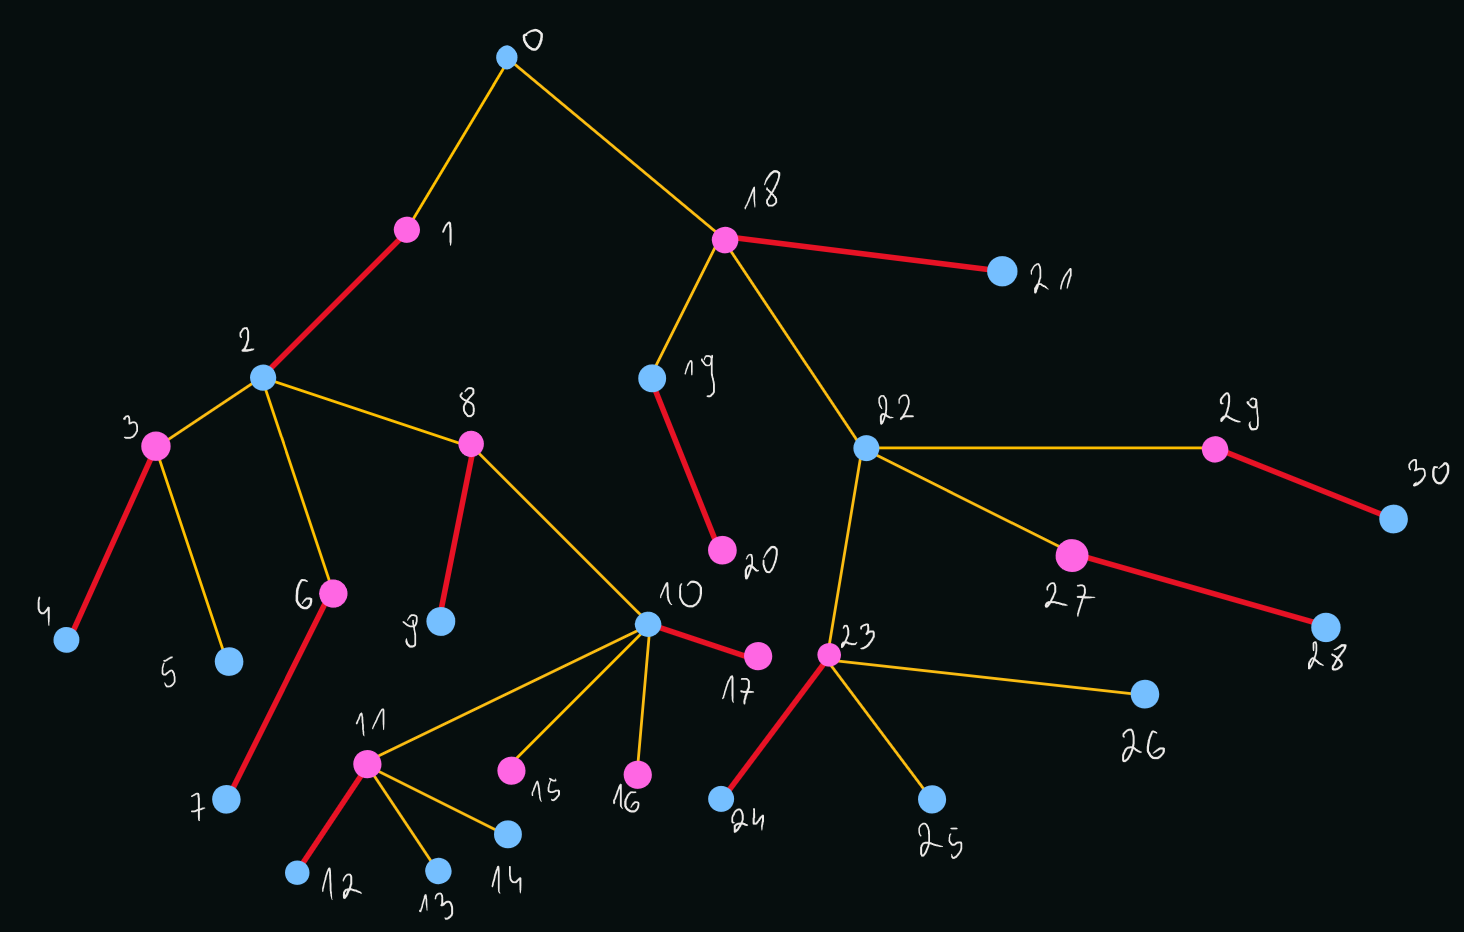

In [9]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (6, 7), (2, 8), (8, 9), (8, 10), (10, 17),
     (10, 16), (10, 15), (10, 11), (11, 12), (11, 13), (11, 14), (0, 18), (18, 21), (18, 19),
     (19, 20), (18, 22), (22, 23), (23, 24), (23, 25), (23, 26), (27, 28), (22, 27), (22, 29), (29, 30)]

T = directed_graph_list(E)

root = 0
print(max_association(T, root))

11


### (Dodatkowo) Odtwarzanie rozwiązania

In [10]:
def max_association(T: 'tree represented by adjacency lists', root_idx: 'index of a root node'):
    n = len(T)
    visited = [0] * n  # 0 - not visited, 1 - visited, 2 - blocked
    total = 0
    edges = []
    
    def block_neighbours(u):
        visited[u] = 2
        for v in T[u]:
            visited[v] = 2
    
    def dfs(u):
        visited[u] = 1
        found = False
        
        for v in T[u]:
            if visited[v] != 1:
                if not dfs(v) and visited[u] != 2:
                    edges.append((u, v))
                    found = True
                    block_neighbours(u)
                    block_neighbours(v)
                    nonlocal total
                    total += 1
                    
        return found
        
    dfs(root_idx)
    
    return total, edges

###### Kilka testów

##### Pomocnicze

In [11]:
def directed_graph_list(E: 'array of edges'):
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
    return G

Drzewo z przykładowym maksymalnym skojarzeniem
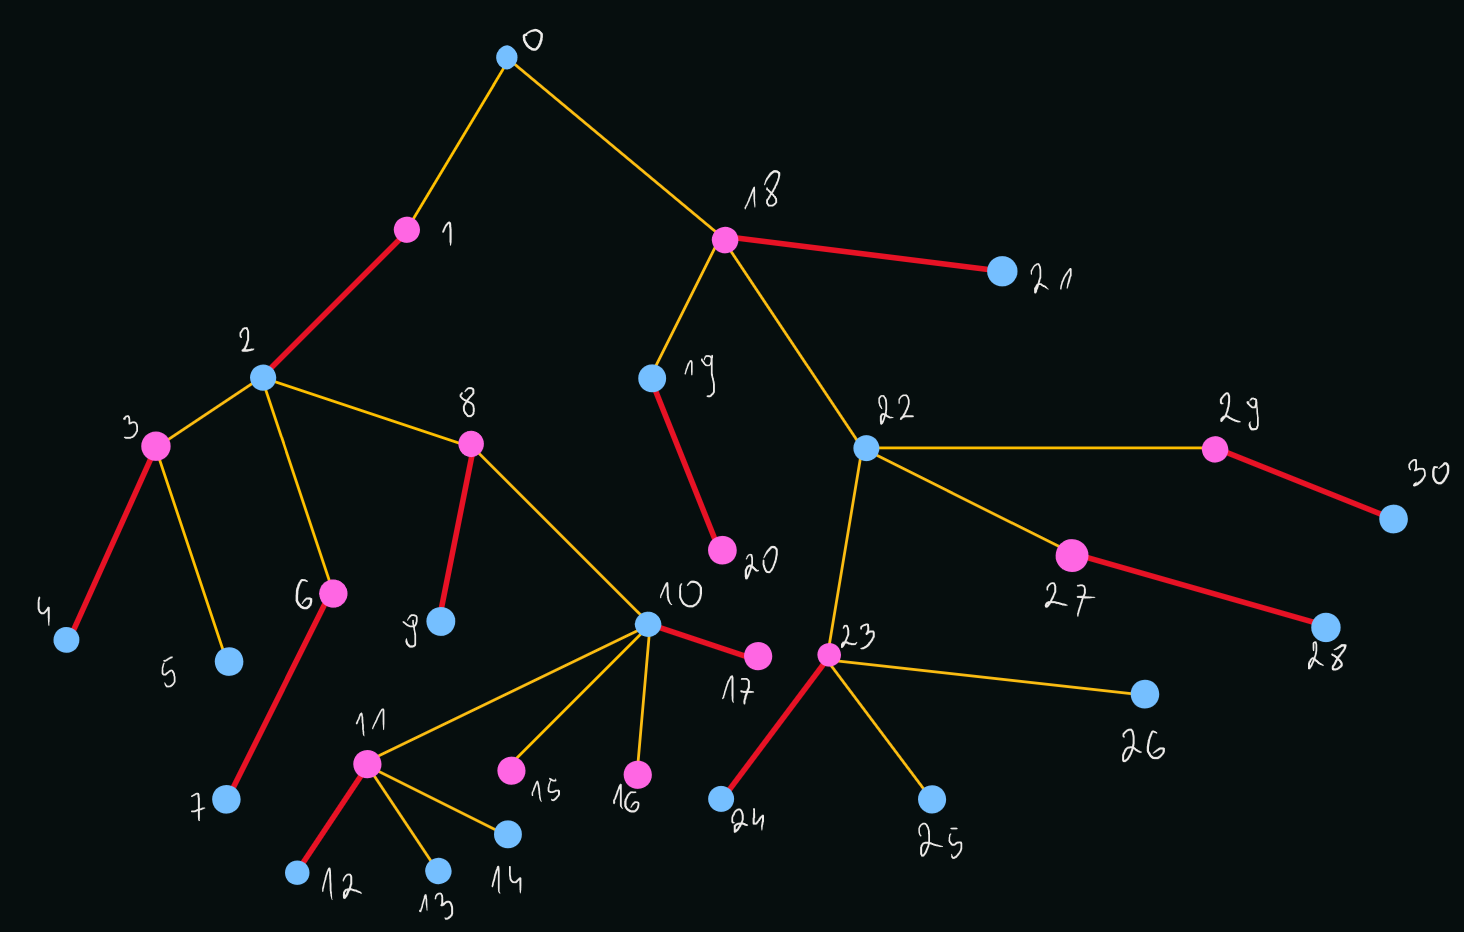

In [12]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (6, 7), (2, 8), (8, 9), (8, 10), (10, 17),
     (10, 16), (10, 15), (10, 11), (11, 12), (11, 13), (11, 14), (0, 18), (18, 21), (18, 19),
     (19, 20), (18, 22), (22, 23), (23, 24), (23, 25), (23, 26), (27, 28), (22, 27), (22, 29), (29, 30)]

T = directed_graph_list(E)

root = 0
print(max_association(T, root))

(11, [(3, 4), (6, 7), (8, 9), (10, 17), (11, 12), (1, 2), (18, 21), (19, 20), (23, 24), (27, 28), (29, 30)])


# (Dodatkowo) Skojarzenie o największej sumie wag krawędzi

### Omówienie algorytmu

###### UWAGA
Omówienie tego algorytmu znajduje się w nagraniu umieszczonym przy poprzedniej implementacji. <br>
Algorytm działa również z ujemnyi wagami krawędzi.

### Złożoność

###### Obliczeniowa:
$ O(n) $, gdzie $ n $ - liczba wierzchołków w drzewie
###### Pamięciowa:
$ O(n) $

### Implementacja

In [13]:
def max_weight_association(T: 'tree represented by adjacency lists', root_idx: 'index of a root node'):
    n = len(T)
    G = [-1] * n
    F = [-1] * n
    
    def f(x):
        """Maximum number of disjoint edges in the x node's subtree"""
        if F[x] < 0:
            F[x] = max(g(x), 0)
            diff = 0
            for y, weight in T[x]:
                diff = max(diff, -f(y) + g(y) + weight)
            F[x] += diff
        return F[x]
        
    def g(x):
        """Maximum number of disjoint edges in the x node's subtree
        when we don't take any of edges which x is connected with"""
        if G[x] < 0:
            G[x] = 0
            for y, _ in T[x]:
                G[x] += f(y)
        return G[x]

    return f(root_idx)  

###### Kilka testów

##### Pomocnicze

In [14]:
def directed_weighted_graph_list(E: 'array of edges'):
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append((edge[1], edge[2]))
    return G

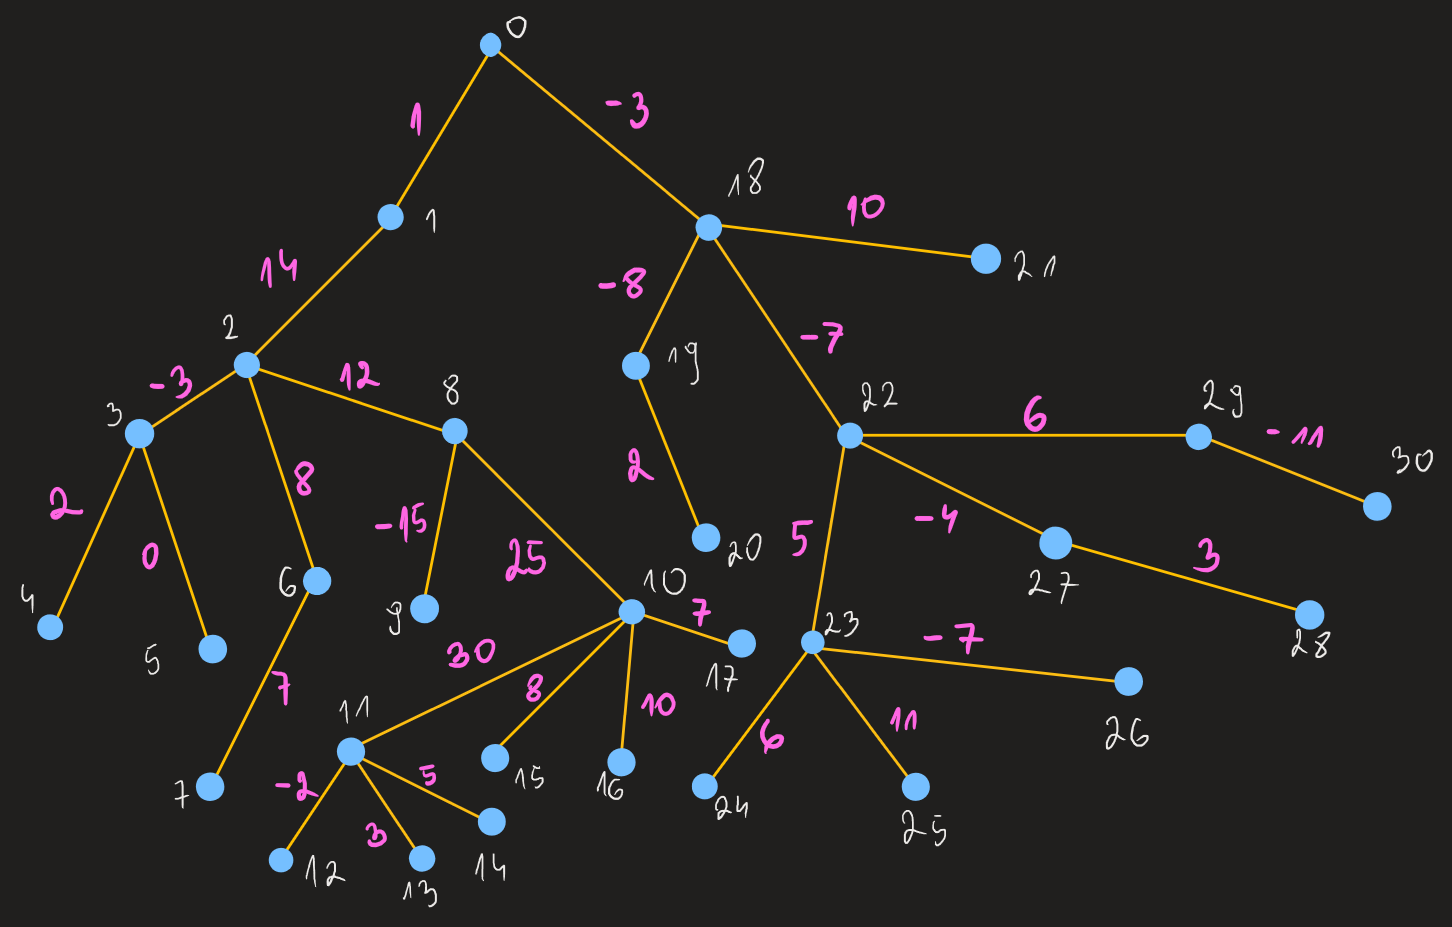

In [15]:
E = [(0, 1, 1), (1, 2, 14), (2, 3, -3), (3, 4, 2), (3, 5, 0), (2, 6, 8), (6, 7, 7), (2, 8, 12), 
     (8, 9, -15), (8, 10, 25), (10, 17, 7), (10, 16, 10), (10, 15, 8), (10, 11, 30), (11, 12, -2), 
     (11, 13, 3), (11, 14, 5), (0, 18, -3), (18, 21, 10), (18, 19, -8), (19, 20, 2), (18, 22, -7), 
     (22, 23, 5), (23, 24, 6), (23, 25, 11), (23, 26, -7), (27, 28, 3), (22, 27, -4), (22, 29, 6), 
     (29, 30, -11)]

T = directed_weighted_graph_list(E)

root = 0
print(max_weight_association(T, root))

85


### (Dodatkowo) Zwracanie listy krawędzi, które tworzą znalezione skojarzenie

In [16]:
def max_weight_association(T: 'tree represented by adjacency lists', root_idx: 'index of a root node'):
    n = len(T)
    G = [-1] * n
    F = [-1] * n
    # Store vertices to which are connected vertices corresponding to the
    # indices of an array below
    E = [-1] * n 
    
    def f(x):
        """Maximum number of disjoint edges in the x node's subtree"""
        if F[x] < 0:
            F[x] = max(g(x), 0)
            diff = 0
            best_y = None
            
            for y, weight in T[x]:
                curr = -f(y) + g(y) + weight
                if curr > diff:
                    diff = curr
                    best_y = y
            
            if best_y:
                # If there was a previous edge adjacent to the x or to the best_y
                # node, remove this edge
                if E[x] >= 0: E[E[x]] = -1
                if E[best_y] >= 0: E[E[best_y]] = -1
                E[x] = best_y
                E[best_y] = x
                F[x] += diff
                
        return F[x]
        
    def g(x):
        """Maximum number of disjoint edges in the x node's subtree
        when we don't take any of edges which x is connected with"""
        if G[x] < 0:
            G[x] = 0
            for y, _ in T[x]:
                G[x] += f(y)
        return G[x]
    
    count = f(root_idx)
    
    # Get edges list
    edges = []
    for u in E:
        if u >= 0:
            edges.append((E[u], u))
            # Remove the second vertex in order not to get the same
            # edge later on again
            E[u] = -1

    return count, edges

###### Kilka testów

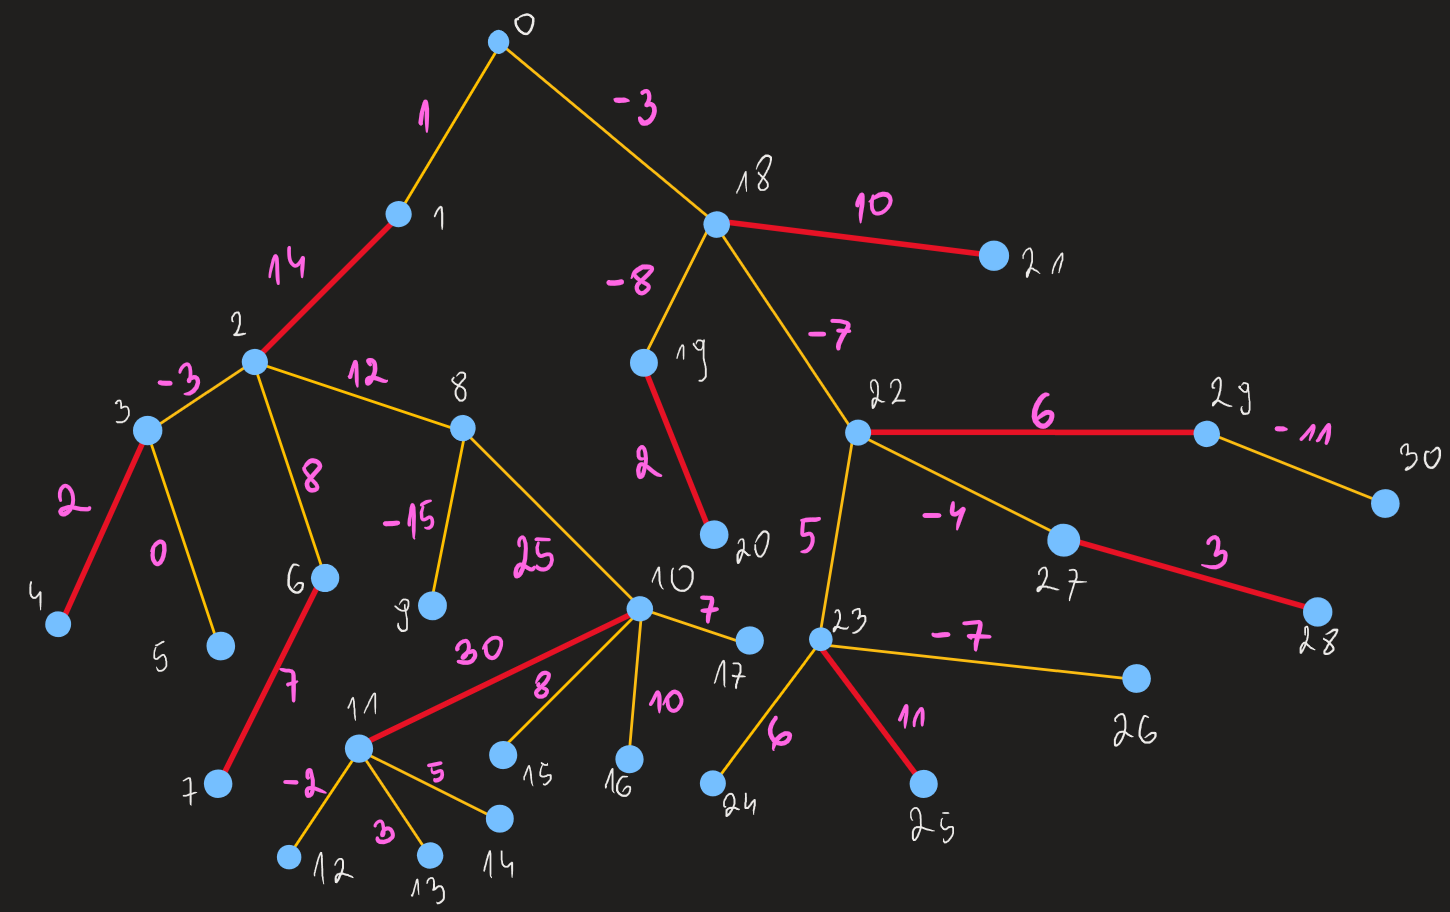

In [17]:
E = [(0, 1, 1), (1, 2, 14), (2, 3, -3), (3, 4, 2), (3, 5, 0), (2, 6, 8), (6, 7, 7), (2, 8, 12), 
     (8, 9, -15), (8, 10, 25), (10, 17, 7), (10, 16, 10), (10, 15, 8), (10, 11, 30), (11, 12, -2), 
     (11, 13, 3), (11, 14, 5), (0, 18, -3), (18, 21, 10), (18, 19, -8), (19, 20, 2), (18, 22, -7), 
     (22, 23, 5), (23, 24, 6), (23, 25, 11), (23, 26, -7), (27, 28, 3), (22, 27, -4), (22, 29, 6), 
     (29, 30, -11)]

T = directed_weighted_graph_list(E)

root = 0
print(max_weight_association(T, root))

(85, [(1, 2), (3, 4), (6, 7), (10, 11), (18, 21), (19, 20), (22, 29), (23, 25), (27, 28)])
